In [1]:
### Libraries ###
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import constants
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [41]:
alpha = constants.alpha   #  Fine-Structure constant
mq    = 3e-6              # [TeV] quark mass
N = int(1000)

def beta_q(s):
    '''
    Beta factor for muons
    '''
    return (1 - 4*mq**2/s)**0.5

def gamma(s):
    '''
        Lorentz factor
    '''
    return 1./(np.sqrt(1-beta_q(s)**2))

def boost_coordinates(s,px):
    '''
        Returns tuple of boosted coordinates (E,p)
    '''
    return (gamma(s)*(s**0.5/2+beta_q(s)*px), gamma(s)*(beta_q(s)*s**0.5/2+px))

def norm(s):
    '''
    Returns norm of three-momentum in CoM frame
    '''
    return (s/4 - mq**2)**0.5

In [42]:
tau = 1./10.

x1 = np.random.exponential(tau, size = N)
x2 = np.random.exponential(tau, size = N)

In [43]:
assert np.all((x1 < 1) & (x1 > 0))
assert np.all((x2 < 1) & (x2 > 0))

Text(0.5, 1.0, 'QCD events')

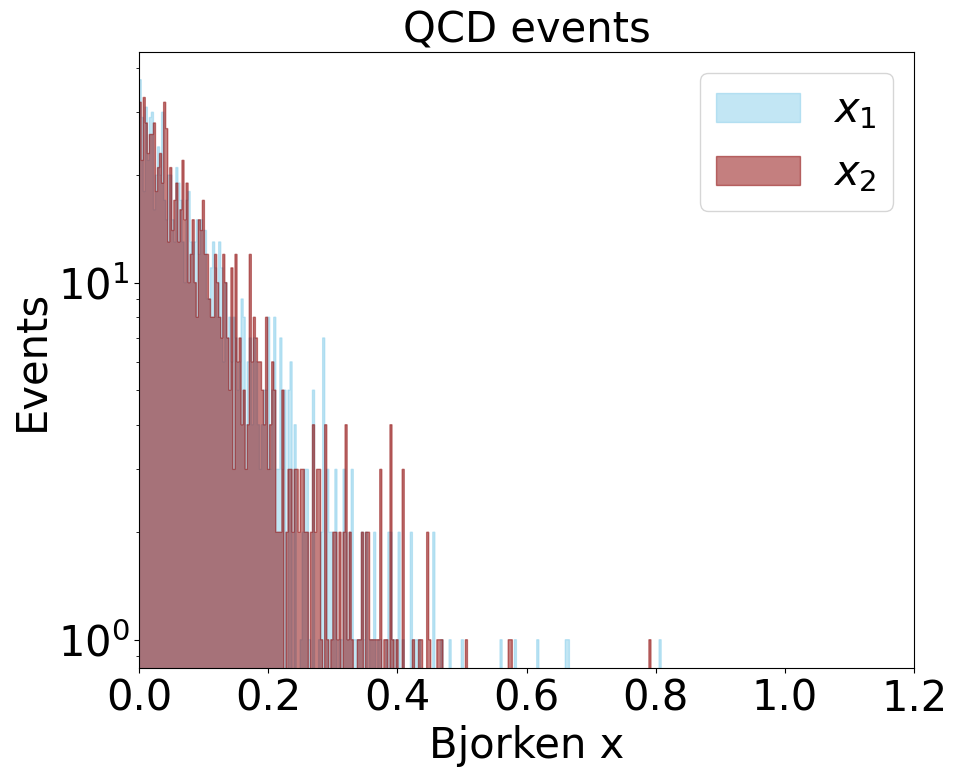

In [44]:
#plotting the results at variable s 
fig, ax = plt.subplots(1, figsize = (10,8))

h_x1, bins_x1, _ = ax.hist(
    x1,
    bins = 256,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.5,
    edgecolor = "skyblue",
    label = r"$x_{1}$"
)
h_x2, bins, _ = ax.hist(
    x2,
    bins = bins_x1,
    histtype = "stepfilled",
    color = "darkred",
    alpha = 0.5,
    edgecolor = "darkred",
    label = r"$x_{2}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Bjorken x", fontsize = 30)
ax.set_ylabel("Events", fontsize = 30)
ax.set_xlim(0, 1.2)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)

In [45]:
E_beam = 6.5 

E_i1 = x1 * E_beam
E_i2 = x2 * E_beam

sqrt_s = E_i1 + E_i2
s = sqrt_s ** 2

theta_CoM = np.random.uniform(0, np.pi, size = N)
phi1 = np.random.uniform(0, 2 * np.pi, size = N)
phi2 = phi1 + np.pi

In [47]:
E1_prime = sqrt_s / 2.
E2_prime = sqrt_s / 2.

px1_prime = E1_prime * np.sin(theta_CoM) * np.cos(phi1)
py1_prime = E1_prime * np.sin(theta_CoM) * np.sin(phi1)
pz1_prime = E1_prime * np.cos(theta_CoM)

px2_prime = E2_prime * np.sin(np.pi - theta_CoM) * np.cos(phi2)
py2_prime = E2_prime * np.sin(np.pi - theta_CoM) * np.sin(phi2)
pz2_prime = E2_prime * np.cos(np.pi - theta_CoM)

In [48]:
# boost coordinates
E1_lab, pz1_lab = boost_coordinates(E1_prime, pz1_prime)
E2_lab, pz2_lab = boost_coordinates(E2_prime, pz2_prime)

Text(0.5, 1.0, 'QCD events')

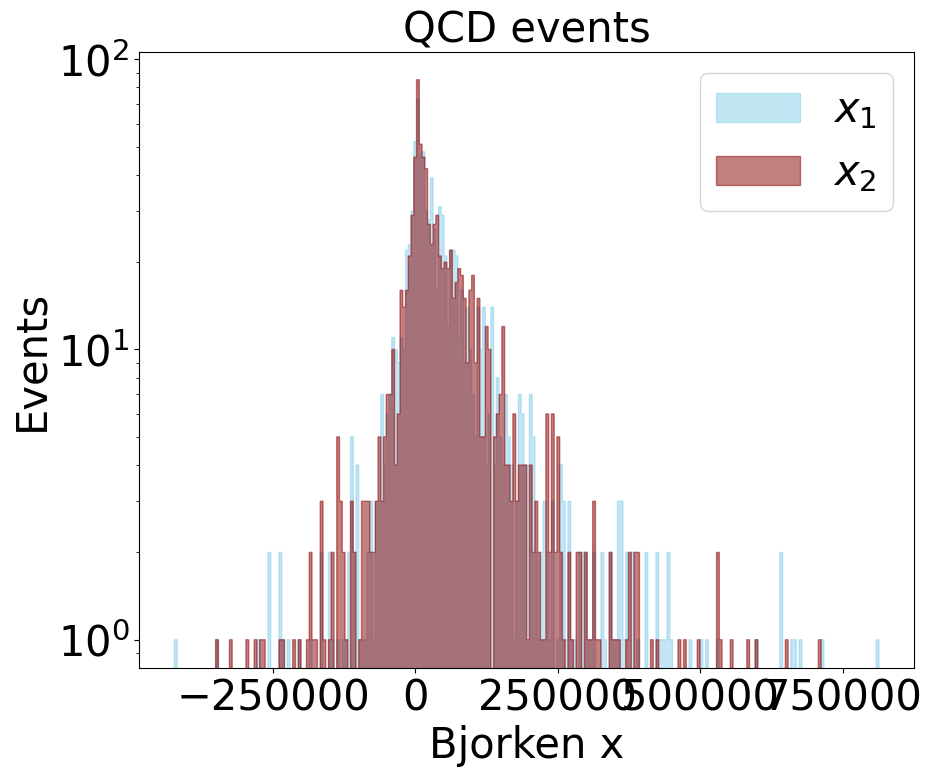

In [51]:
#plotting the results at variable s 
fig, ax = plt.subplots(1, figsize = (10,8))

h_x1, bins_x1, _ = ax.hist(
    E1_lab,
    bins = 256,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.5,
    edgecolor = "skyblue",
    label = r"$x_{1}$"
)
h_x2, bins, _ = ax.hist(
    E2_lab,
    bins = bins_x1,
    histtype = "stepfilled",
    color = "darkred",
    alpha = 0.5,
    edgecolor = "darkred",
    label = r"$x_{2}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Bjorken x", fontsize = 30)
ax.set_ylabel("Events", fontsize = 30)

ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)